<a href="https://colab.research.google.com/github/NadithM/pythonII/blob/master/matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demo Hello World



In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

hosts = pd.read_csv('/content/sample_data/olympic_hosts.csv')
hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
1,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
2,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014
3,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
4,vancouver-2010,2010-02-28T04:00:00Z,2010-02-12T16:00:00Z,Canada,Vancouver 2010,Winter,2010


#Creating And Customizing First Plot

##(01). Creating simple 2D Graph

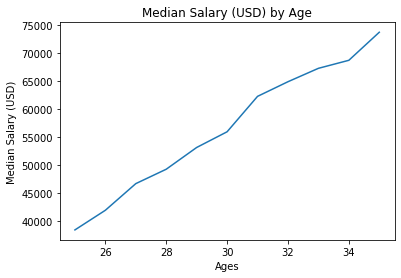

In [25]:
from matplotlib import pyplot as plt
ages_x = [25,26,27,28,29,30,31,32,33,34,35]
dev_y = [38496,42000,46752,49320,53200,56000,62316,64928,67317,68748,73752]

plt.plot(ages_x, dev_y)

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.show()

##(02) 

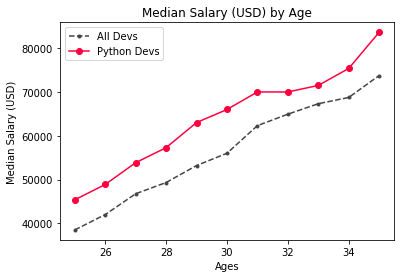

In [24]:
from matplotlib import pyplot as plt
ages_x = [25,26,27,28,29,30,31,32,33,34,35]
dev_y = [38496,42000,46752,49320,53200,56000,62316,64928,67317,68748,73752]

plt.plot(ages_x, dev_y, color='#444444', linestyle='--',marker='.', label="All Devs")

py_dev_y = [45372,48876,53850,57287,63016,65998,70003,70000,71496,75370,83640]

plt.plot(ages_x, py_dev_y, color='#5a7d9a', marker='o', label='Python Devs')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend(['All Devs', 'Python Devs'])

plt.show()